<a href="https://colab.research.google.com/github/Hyunggilwoo/CSE422/blob/main/422_hw6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
This code will generate the following types of graph:
Cycle graph, wheel graph, line graph, and a line + point graph


In [ ]:
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import networkx as nx

num = 150

In [ ]:

def adjacency_matrix(graph_type):

  adjacency_matrix = nx.adjacency_matrix(graph_type)
  dense_adjacency_matrix = adjacency_matrix.toarray()

  return dense_adjacency_matrix
  # print(dense_adjacency_matrix)

In [ ]:
def generate_diagonal_matrix(adjacency_matrix, size = num):
  '''
  https://docs.google.com/presentation/d/1oQ_2XM3tHJvdC__9N6n-TbN3DxSgT6DteeP1UeiDgQ0/edit#slide=id.g86477fec6b_1_1687
  '''
  diagonal_matrix = np.zeros((size, size))
  a = adjacency_matrix

  row_sum = np.sum(adjacency_matrix, axis = 1)

  for i in range(len(row_sum)):
    diagonal_matrix[i, i] = row_sum[i]

  # print(diagonal_matrix)
  return diagonal_matrix


def laplacian_graph(adjacency, diagonal):
  '''
  Output Laplacian matrix : diagonal - Adjacency matrix
  '''
  return diagonal - adjacency

In [ ]:
## geneate the cycle graph's diagonal graph
adjacency = adjacency_matrix(nx.cycle_graph(num))

diagonal = generate_diagonal_matrix(adjacency)

## Generate laplacian graph
LG_cycle = laplacian_graph(adjacency, diagonal)
print(LG_cycle)

[[ 2. -1.  0. ...  0.  0. -1.]
 [-1.  2. -1. ...  0.  0.  0.]
 [ 0. -1.  2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  2. -1.  0.]
 [ 0.  0.  0. ... -1.  2. -1.]
 [-1.  0.  0. ...  0. -1.  2.]]


In [ ]:

# Generate the wheel graph
G = nx.wheel_graph(num)

def wheel_adjacency_matrix(graph_type):
  cycle_graph = graph_type # nx.cycle_graph(num)
  adjacency_matrix = nx.adjacency_matrix(G, dtype=np.float64)
  dense_adjacency_matrix = adjacency_matrix.toarray()

  return dense_adjacency_matrix
# Calculate adjacency matrix
adjacency_wheel = adjacency_matrix(G)
# flips the ordering of the graph to output it correctly
adjacency_wheel = adjacency_wheel[::-1, ::-1]
# Calculate degree matrix
degree_wheel = np.diag(np.sum(np.array(adjacency_wheel), axis=1))

# Calculate Laplacian matrix
LG_wheel = degree_wheel - adjacency_wheel
print(LG_wheel)

[[  3  -1   0 ...   0  -1  -1]
 [ -1   3  -1 ...   0   0  -1]
 [  0  -1   3 ...   0   0  -1]
 ...
 [  0   0   0 ...   3  -1  -1]
 [ -1   0   0 ...  -1   3  -1]
 [ -1  -1  -1 ...  -1  -1 149]]


In [ ]:
## generate the line graph
adjacency2 = adjacency_matrix(nx.path_graph(num))

diagonal2 = generate_diagonal_matrix(adjacency2)

LG_line = laplacian_graph(adjacency2, diagonal2)
print(LG_line)

[[ 1. -1.  0. ...  0.  0.  0.]
 [-1.  2. -1. ...  0.  0.  0.]
 [ 0. -1.  2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  2. -1.  0.]
 [ 0.  0.  0. ... -1.  2. -1.]
 [ 0.  0.  0. ...  0. -1.  1.]]


In [ ]:
## generate the line + point graph
def path_point_graph():
  path_graph = nx.path_graph(num)

  # Connect all the n-1 nodes to the nth point
  for i in range(num - 1):
      path_graph.add_edge(i, num - 1)
  adjacency_matrix = nx.adjacency_matrix(path_graph)
  dense_adjacency_matrix = adjacency_matrix.toarray()

  return dense_adjacency_matrix

adjacency3 = path_point_graph()
diagonal3 = generate_diagonal_matrix(adjacency3)

## Generate laplacian graph
LG_line_point = laplacian_graph(adjacency3, diagonal3)
print(LG_line_point)

[[  2.  -1.   0. ...   0.   0.  -1.]
 [ -1.   3.  -1. ...   0.   0.  -1.]
 [  0.  -1.   3. ...   0.   0.  -1.]
 ...
 [  0.   0.   0. ...   3.  -1.  -1.]
 [  0.   0.   0. ...  -1.   2.  -1.]
 [ -1.  -1.  -1. ...  -1.  -1. 149.]]


In [ ]:
# used for 1c) & 1d)
def generate_evalue_evector(matrix):
  '''
  Return largest eigen_values and the corresponding eigenvectors
  '''

  w, v = LA.eig(matrix)

  # Sort eigenvalues and eigenvectors based on eigenvalues' magnitudes of laplacian matrix
  sorted_indices = np.argsort(w)
  sorted_eigenvalues = w[sorted_indices]
  sorted_eigenvectors = v[:, sorted_indices]

  return sorted_eigenvalues, sorted_eigenvectors

Smallest Eigenvalue:  3.331957500099815e-15
2nd Smallest Eigenvalue:  0.001754339802282772
Largest Eigenvalue:  4.000000000000007
2nd Largest Eigenvalue:  3.9982456601977208


Text(0.5, 1.0, 'Cycle Graph Laplacian Matrix')

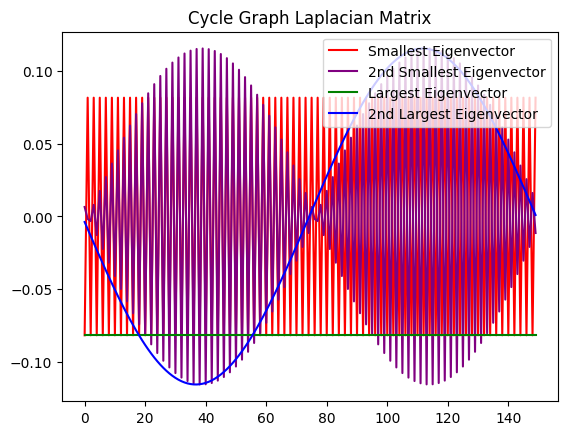

In [ ]:
# For each Laplacian and Adjacency Matrix, generate four plots of Smallest, second smallest, largest, and second largest

# plot the eigenvector of laplacain Cycle graph

eigenvalues, eigenvectors = generate_evalue_evector(LG_cycle)

# print eigenvalue
print("Smallest Eigenvalue: ", eigenvalues[0])
print("2nd Smallest Eigenvalue: ", eigenvalues[1])

print("Largest Eigenvalue: ", eigenvalues[-1])
print("2nd Largest Eigenvalue: ", eigenvalues[-2])

plt.plot(range(len(eigenvectors)), eigenvectors[:, -1], c = 'red')
plt.plot(range(len(eigenvectors)), eigenvectors[:, -2], c = 'purple')
plt.plot(range(len(eigenvectors)), eigenvectors[:, 0], c = 'green')
plt.plot(range(len(eigenvectors)), eigenvectors[:, 1], c = 'blue')
plt.legend(['Smallest Eigenvector', '2nd Smallest Eigenvector', 'Largest Eigenvector', '2nd Largest Eigenvector'], loc = 'upper right')
plt.title('Cycle Graph Laplacian Matrix')

Smallest Eigenvalue:  -1.999999999999994
2nd Smallest Eigenvalue:  -1.998245660197719
Largest Eigenvalue:  2.000000000000004
2nd Largest Eigenvalue:  1.9982456601977157


Text(0.5, 1.0, 'Cycle Graph Adjacency Matrix')

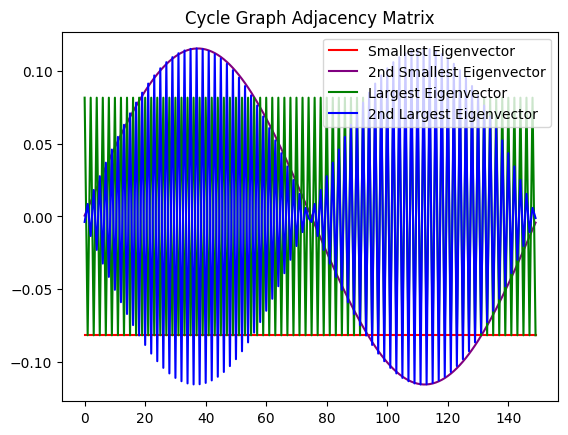

In [ ]:
# plot the eigenvector of Adjacency Cycle graph
eigenvalues, eigenvectors = generate_evalue_evector(adjacency)

# print eigenvalue
print("Smallest Eigenvalue: ", eigenvalues[0])
print("2nd Smallest Eigenvalue: ", eigenvalues[1])

print("Largest Eigenvalue: ", eigenvalues[-1])
print("2nd Largest Eigenvalue: ", eigenvalues[-2])

plt.plot(range(len(eigenvectors)), eigenvectors[:, -1], c = 'red')
plt.plot(range(len(eigenvectors)), eigenvectors[:, -2], c = 'purple')
plt.plot(range(len(eigenvectors)), eigenvectors[:, 0], c = 'green')
plt.plot(range(len(eigenvectors)), eigenvectors[:, 1], c = 'blue')
plt.legend(['Smallest Eigenvector', '2nd Smallest Eigenvector', 'Largest Eigenvector', '2nd Largest Eigenvector'], loc = 'upper right')
plt.title('Cycle Graph Adjacency Matrix')

Smallest Eigenvalue:  -2.4259506418648733e-15
2nd Smallest Eigenvalue:  1.0017779635069954
Largest Eigenvalue:  150.0000000000001
2nd Largest Eigenvalue:  4.999555459719246


Text(0.5, 1.0, 'Wheel Graph Laplacian Matrix')

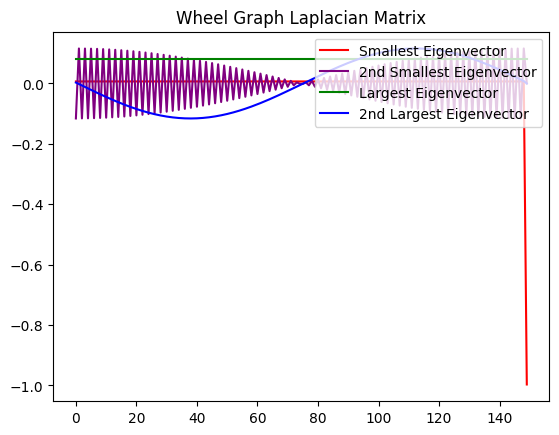

In [ ]:
# For each Laplacian and Adjacency Matrix, generate four plots of Smallest, second smallest, largest, and second largest

# plot the eigenvector of wheel graph's laplacian matrix

eigenvalues, eigenvectors = generate_evalue_evector(LG_wheel)

# print smallest eigenvalue and 2nd smallest eigenvalue
print("Smallest Eigenvalue: ", eigenvalues[0])
print("2nd Smallest Eigenvalue: ", eigenvalues[1])

print("Largest Eigenvalue: ", eigenvalues[-1])
print("2nd Largest Eigenvalue: ", eigenvalues[-2])

plt.plot(range(len(eigenvectors)), eigenvectors[:, -1], c = 'red')
plt.plot(range(len(eigenvectors)), eigenvectors[:, -2], c = 'purple')
plt.plot(range(len(eigenvectors)), eigenvectors[:, 0], c = 'green')
plt.plot(range(len(eigenvectors)), eigenvectors[:, 1], c = 'blue')
plt.legend(['Smallest Eigenvector', '2nd Smallest Eigenvector', 'Largest Eigenvector', '2nd Largest Eigenvector'], loc = 'upper right')
plt.title('Wheel Graph Laplacian Matrix')

Smallest Eigenvalue:  -11.24744871391586
2nd Smallest Eigenvalue:  -1.999555459719259
Largest Eigenvalue:  13.247448713915865
2nd Largest Eigenvalue:  1.9982220364930132


Text(0.5, 1.0, 'Wheel Graph Adjacency Matrix')

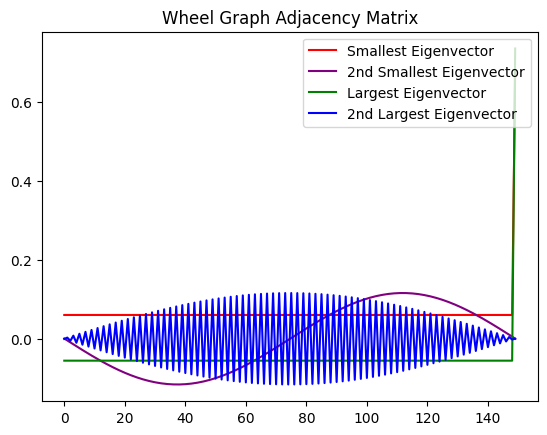

In [ ]:
eigenvalues, eigenvectors = generate_evalue_evector(adjacency_wheel)

# print eigenvalue
print("Smallest Eigenvalue: ", eigenvalues[0])
print("2nd Smallest Eigenvalue: ", eigenvalues[1])

print("Largest Eigenvalue: ", eigenvalues[-1])
print("2nd Largest Eigenvalue: ", eigenvalues[-2])

plt.plot(range(len(eigenvectors)), eigenvectors[:, -1], c = 'red')
plt.plot(range(len(eigenvectors)), eigenvectors[:, -2], c = 'purple')
plt.plot(range(len(eigenvectors)), eigenvectors[:, 0], c = 'green')
plt.plot(range(len(eigenvectors)), eigenvectors[:, 1], c = 'blue')
plt.legend(['Smallest Eigenvector', '2nd Smallest Eigenvector', 'Largest Eigenvector', '2nd Largest Eigenvector'], loc = 'upper right')
plt.title('Wheel Graph Adjacency Matrix')

Smallest Eigenvalue:  2.8142422849331943e-16
2nd Smallest Eigenvalue:  0.0004386330503090454
Largest Eigenvalue:  3.999561366949691
2nd Largest Eigenvalue:  3.9982456601977163


Text(0.5, 1.0, "Line Graph's Laplacian Matrix")

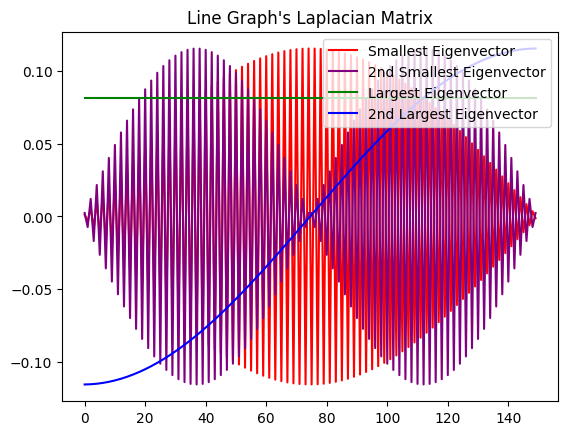

In [ ]:
# For each Laplacian and Adjacency Matrix, generate four plots of Smallest, second smallest, largest, and second largest

# plot the eigenvector of Line graph's laplacian matrix

eigenvalues, eigenvectors = generate_evalue_evector(LG_line)

# eigenvalue
print("Smallest Eigenvalue: ", eigenvalues[0])
print("2nd Smallest Eigenvalue: ", eigenvalues[1])

print("Largest Eigenvalue: ", eigenvalues[-1])
print("2nd Largest Eigenvalue: ", eigenvalues[-2])

plt.plot(range(len(eigenvectors)), eigenvectors[:, -1], c = 'red')
plt.plot(range(len(eigenvectors)), eigenvectors[:, -2], c = 'purple')
plt.plot(range(len(eigenvectors)), eigenvectors[:, 0], c = 'green')
plt.plot(range(len(eigenvectors)), eigenvectors[:, 1], c = 'blue')
plt.legend(['Smallest Eigenvector', '2nd Smallest Eigenvector', 'Largest Eigenvector', '2nd Largest Eigenvector'], loc = 'upper right')
plt.title('Line Graph\'s Laplacian Matrix')

Smallest Eigenvalue:  -1.9995671572126457
2nd Smallest Eigenvalue:  -1.9982688162034627
Largest Eigenvalue:  1.9995671572126452
2nd Largest Eigenvalue:  1.9982688162034608


Text(0.5, 1.0, "Line Graph's Adjacency Matrix")

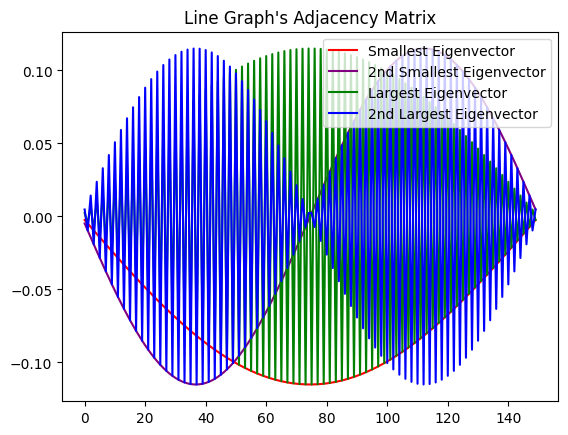

In [ ]:
eigenvalues, eigenvectors = generate_evalue_evector(adjacency2)

# eigenvalue
print("Smallest Eigenvalue: ", eigenvalues[0])
print("2nd Smallest Eigenvalue: ", eigenvalues[1])

print("Largest Eigenvalue: ", eigenvalues[-1])
print("2nd Largest Eigenvalue: ", eigenvalues[-2])

plt.plot(range(len(eigenvectors)), eigenvectors[:, -1], c = 'red')
plt.plot(range(len(eigenvectors)), eigenvectors[:, -2], c = 'purple')
plt.plot(range(len(eigenvectors)), eigenvectors[:, 0], c = 'green')
plt.plot(range(len(eigenvectors)), eigenvectors[:, 1], c = 'blue')
plt.legend(['Smallest Eigenvector', '2nd Smallest Eigenvector', 'Largest Eigenvector', '2nd Largest Eigenvector'], loc = 'upper right')
plt.title('Line Graph\'s Adjacency Matrix')

Smallest Eigenvalue:  4.574258313215255e-17
2nd Smallest Eigenvalue:  1.0004445402807602
Largest Eigenvalue:  150.00000000000006
2nd Largest Eigenvalue:  4.99955545971925


Text(0.5, 1.0, "Line + Point Graph's Laplacian Matrix")

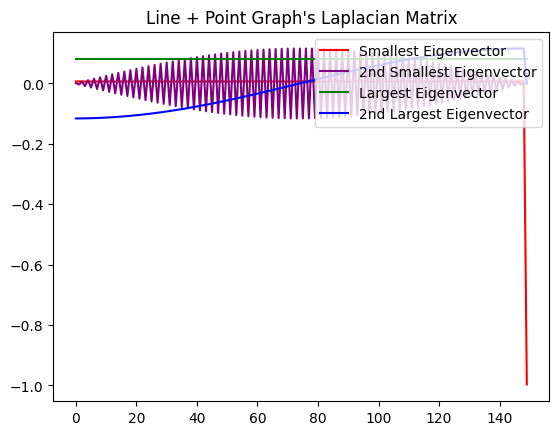

In [ ]:
# For each Laplacian and Adjacency Matrix, generate four plots of Smallest, second smallest, largest, and second largest

# plot the eigenvector of Line graph's laplacian matrix

eigenvalues, eigenvectors = generate_evalue_evector(LG_line_point)

# eigenvalue
print("Smallest Eigenvalue: ", eigenvalues[0])
print("2nd Smallest Eigenvalue: ", eigenvalues[1])

print("Largest Eigenvalue: ", eigenvalues[-1])
print("2nd Largest Eigenvalue: ", eigenvalues[-2])

plt.plot(range(len(eigenvectors)), eigenvectors[:, -1], c = 'red')
plt.plot(range(len(eigenvectors)), eigenvectors[:, -2], c = 'purple')
plt.plot(range(len(eigenvectors)), eigenvectors[:, 0], c = 'green')
plt.plot(range(len(eigenvectors)), eigenvectors[:, 1], c = 'blue')
plt.legend(['Smallest Eigenvector', '2nd Smallest Eigenvector', 'Largest Eigenvector', '2nd Largest Eigenvector'], loc = 'upper right')
plt.title('Line + Point Graph\'s Laplacian Matrix')

Smallest Eigenvalue:  -11.254158952105408
2nd Smallest Eigenvalue:  -1.9995613257613525
Largest Eigenvalue:  13.240734899136301
2nd Largest Eigenvalue:  1.9982456601977192


Text(0.5, 1.0, "Line + Point Graph's Adjacency Matrix")

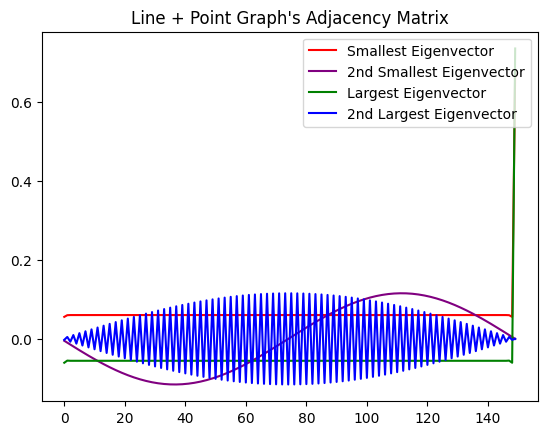

In [ ]:
eigenvalues, eigenvectors = generate_evalue_evector(adjacency3)

# eigenvalue
print("Smallest Eigenvalue: ", eigenvalues[0])
print("2nd Smallest Eigenvalue: ", eigenvalues[1])

print("Largest Eigenvalue: ", eigenvalues[-1])
print("2nd Largest Eigenvalue: ", eigenvalues[-2])

plt.plot(range(len(eigenvectors)), eigenvectors[:, -1], c = 'red')
plt.plot(range(len(eigenvectors)), eigenvectors[:, -2], c = 'purple')
plt.plot(range(len(eigenvectors)), eigenvectors[:, 0], c = 'green')
plt.plot(range(len(eigenvectors)), eigenvectors[:, 1], c = 'blue')
plt.legend(['Smallest Eigenvector', '2nd Smallest Eigenvector', 'Largest Eigenvector', '2nd Largest Eigenvector'], loc = 'upper right')
plt.title('Line + Point Graph\'s Adjacency Matrix')

In [ ]:

## plot spectral embedding of the 4 graphs from above
def plot_spectral_embedding_and_overlay_edges(laplacian, name):
  laplacian_eigenvalues, laplacian_eigenvectors = generate_evalue_evector(laplacian)
  laplacian_smallest_evectors = laplacian_eigenvectors[:, :3]

  second_smallest_eigenvector = laplacian_smallest_evectors[:, 1]
  third_smallest_eigenvector = laplacian_smallest_evectors[:, 2]

  plt.scatter(second_smallest_eigenvector, third_smallest_eigenvector)

  # Initialize a graph to be traverse edges
  G = nx.from_numpy_array(laplacian)
  # Overlay graph edges
  for edge in G.edges:
    i, j = edge
    x_coords = [second_smallest_eigenvector[i], second_smallest_eigenvector[j]]
    y_coords = [third_smallest_eigenvector[i], third_smallest_eigenvector[j]]
    plt.plot(x_coords, y_coords, color="gray", linestyle="-", linewidth=0.5, alpha=0.5)

  plt.xlabel("2nd smallest eigenvector")
  plt.ylabel("3rd smallest eigenvectore")
  plt.title(f"Spectral Embedding with edges of {name}")
  plt.grid()
  plt.show()


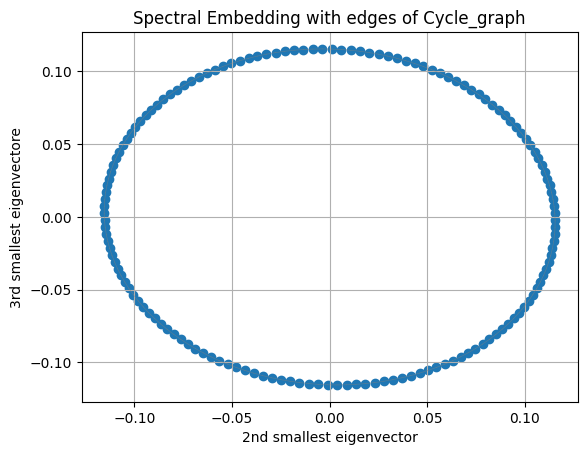

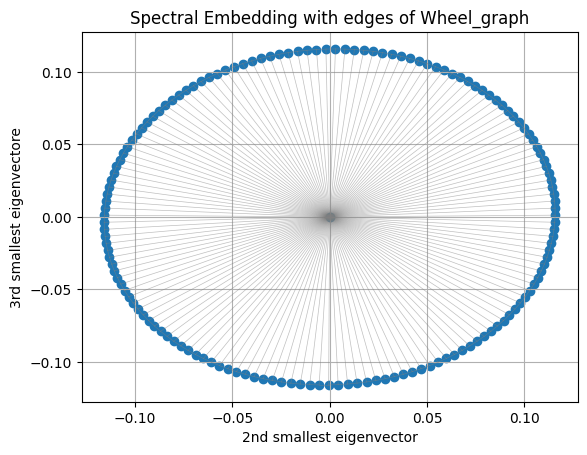

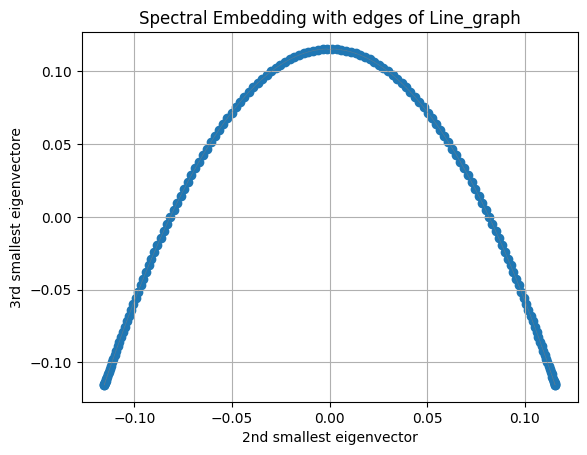

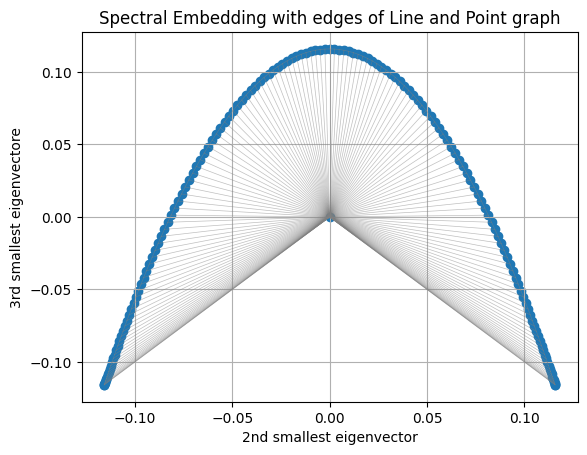

In [ ]:
#plot the cycle graph
plot_spectral_embedding_and_overlay_edges(LG_cycle, "Cycle_graph")

#plot wheel graph
plot_spectral_embedding_and_overlay_edges(LG_wheel, "Wheel_graph")

# plot line graph
plot_spectral_embedding_and_overlay_edges(LG_line, "Line_graph")
# plot line + point graph
plot_spectral_embedding_and_overlay_edges(LG_line_point, "Line and Point graph")

In [ ]:
# 1d)
from numpy.random import default_rng
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
import networkx as nx

num = 600

In [ ]:
def eigenvectors_of_laplacian(adjacency_matrix):
  '''
  Convert distance matrix into a laplacian matrix
  '''
  # Compute the Laplacian matrix
  laplacian_matrix = generate_laplacian_matrix(adjacency_matrix, num)

  # Compute the eigenvectors of the Laplacian matrix
  eigenvalues, eigenvectors = generate_evalue_evector(laplacian_matrix)

  return eigenvectors


def edge_condition(distance):
  return distance <= 1/2

# compute eigenvectors of a laplacian graph
# and plot the embedding of the graph in 2nd and 3rd smallest eigenvector
def generate_laplacian_matrix(dist_matrix, num):
  adjacency_matrix = np.zeros((num, num))

  for i in range(num):
    for j in range(i + 1, num):
      if edge_condition(dist_matrix[i, j]):
        adjacency_matrix[i, j] += 1
        adjacency_matrix[j, i] += 1

  degree_matrix = np.diag(np.sum(adjacency_matrix, axis = 1))

  # laplacian matrix
  laplacian_matrix = degree_matrix - adjacency_matrix
  return laplacian_matrix

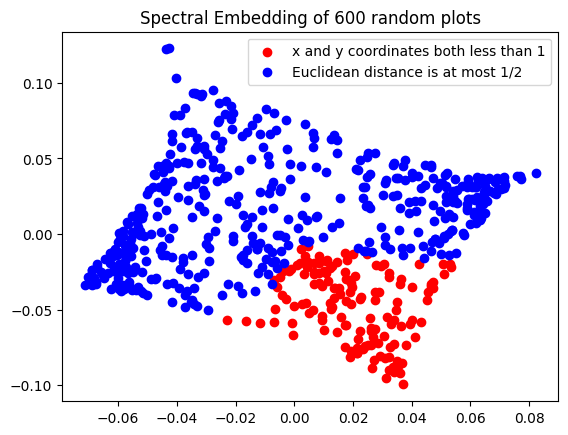

In [ ]:
# used for 1d)
def spectral_embedding(num):
  x = np.random.uniform(low = 0.0, high = 2.0, size= num)
  y = np.random.uniform(low = 0.0, high = 2.0, size = num)
  points = np.column_stack((x, y))

  # construct a matrix that computes distance with each other points
  distant_matrix = squareform(pdist(points))

  # convert distance matrix -> laplacian matrix
  eigenvectors = eigenvectors_of_laplacian(distant_matrix)
  laplacian_smallest_evectors = eigenvectors[:, :3]

  # obtain the 2nd and 3rd smallest eigenvector
  second_smallest_eigenvector = laplacian_smallest_evectors[:, 1]
  third_smallest_eigenvector = laplacian_smallest_evectors[:, 2]


  # if both x & y < 1, have a diff color
  mask = (x < 1) & (y < 1)
  # diff stuff
  plt.scatter(second_smallest_eigenvector[mask], third_smallest_eigenvector[mask], color='r')

  plt.scatter(second_smallest_eigenvector[~mask], third_smallest_eigenvector[~mask], color='b')
  plt.title("Spectral Embedding of 600 random plots")
  plt.legend(['x and y coordinates both less than 1', 'Euclidean distance is at most 1/2'], loc = 'upper right')
  plt.savefig("spectral_embedding_of_600_random_plots.png")
  plt.show()

spectral_embedding(num)


In [ ]:
#1e) generate spectral embedding of grid graph of 100 X 100
size = 10

# adjacency_grid = adjacency_matrix(nx.grid_graph(dim=[size, size]))
G = nx.grid_graph(dim=[size, size])
# diagonal_grid = generate_diagonal_matrix(adjacency_grid, size)
adjacency_grid = nx.to_numpy_array(G)

# Calculate degree matrix
diagonal_grid = np.diag(np.sum(np.array(adjacency_grid), axis=1))

# Calculate Laplacian matrix
# LG_grid = diagonal_grid - adjacency

LG_grid = diagonal_grid - adjacency_grid
print(LG_grid)
print(LG_grid.shape)
print(LG_grid.size)
# plot_spectral_embedding_and_overlay_edges

[[ 2. -1.  0. ...  0.  0.  0.]
 [-1.  3. -1. ...  0.  0.  0.]
 [ 0. -1.  3. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  3. -1.  0.]
 [ 0.  0.  0. ... -1.  3. -1.]
 [ 0.  0.  0. ...  0. -1.  2.]]
(100, 100)
10000


In [ ]:
#1e)
## plot spectral embedding of the 4 graphs from above
def plot_spectral_embedding_and_overlay_edges(laplacian, name):
  laplacian_eigenvalues, laplacian_eigenvectors = generate_evalue_evector(laplacian)
  laplacian_smallest_evectors = laplacian_eigenvectors[:, :3]

  second_smallest_eigenvector = laplacian_smallest_evectors[:, 1]
  third_smallest_eigenvector = laplacian_smallest_evectors[:, 2]

  plt.scatter(second_smallest_eigenvector, third_smallest_eigenvector)

  # Initialize a graph to be traverse edges
  G = nx.from_numpy_array(laplacian)
  # Overlay graph edges

  for edge in G.edges:
    i, j = edge
    i_i, i_j = divmod(i, 100)
    j_i, j_j = divmod(j, 100)

    if abs(i_i - j_i) <= 1 and abs(i_j - j_j) <= 1:
        x_coords = [second_smallest_eigenvector[i], second_smallest_eigenvector[j]]
        y_coords = [third_smallest_eigenvector[i], third_smallest_eigenvector[j]]
        plt.plot(x_coords, y_coords, color="gray", linestyle="-", linewidth=0.5, alpha=0.5)

  plt.xlabel("2nd smallest eigenvector")
  plt.ylabel("3rd smallest eigenvector")
  plt.title(f"Spectral Embedding with edges of {name}")
  plt.grid()
  plt.show()

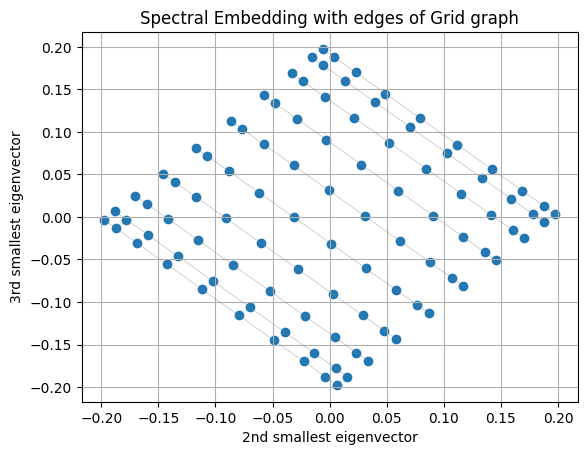

In [ ]:
plot_spectral_embedding_and_overlay_edges(LG_grid, "Grid graph")

In [ ]:
import random
num_remove = 100
def remove_random_element(matrix, num):
  n = matrix.size
  all_indices = list(range(n))
  removed_indices = random.sample(all_indices, num)

  # make a copy of the matrix
  modified_matrix = matrix.copy().flatten()

  for idx in removed_indices:
    modified_matrix[idx] = 0

  restored_matrix = np.reshape(modified_matrix, (100, 100))
  return restored_matrix


[[ 2. -1.  0. ...  0.  0.  0.]
 [-1.  3. -1. ...  0.  0.  0.]
 [ 0. -1.  3. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  3. -1.  0.]
 [ 0.  0.  0. ... -1.  3. -1.]
 [ 0.  0.  0. ...  0. -1.  2.]]


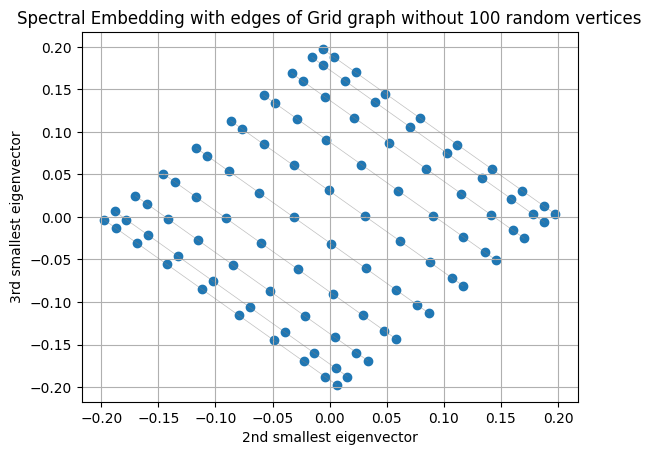

In [ ]:
print(remove_random_element(LG_grid, num_remove))
adjusted_LG_grid = remove_random_element(LG_grid, num_remove)
plot_spectral_embedding_and_overlay_edges(LG_grid, "Grid graph without 100 random vertices")

In [ ]:
# 2a) compute the smallest 12 eigenvalues and corresponding eigenvectors
# shape of the graph = (61796, 2)
from numpy import linalg as LA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
import networkx as nx


In [ ]:

file_path = '/content/friends.csv'
data = np.loadtxt(file_path, dtype=int, delimiter=',')

# sorted the data
# sorted_data = sort_2d_matrix(data)
# print(sorted_data)
# size = int(np.max(data[:, 0])) + 1
def print_adjacency_matrix(data):
  # nodes, indices = np.unique(data, return_inverse=True)
  # size = len(nodes)

  size = np.max(data) + 1
  print(size)
  # print(max_first_part)
  adjacency_matrix = np.zeros((size, size), dtype=int)

  for row in data:


    adjacency_matrix[row[0], row[1]] += 1
    adjacency_matrix[row[1], row[0]] += 1

  # print(adjacency_matrix)
  return adjacency_matrix

adjacency_matrix = print_adjacency_matrix(data)
print(adjacency_matrix)

NameError: ignored

In [ ]:
def print_diagonal_matrix(matrix):
  degree_matrix = np.diag(np.sum(adjacency_matrix, axis = 1))
  return degree_matrix

diagonal_matrix = print_diagonal_matrix(adjacency_matrix)


In [ ]:
laplacian_matrix = diagonal_matrix - adjacency_matrix
print(laplacian_matrix)

num_eigval = 12
# output the sorted eigenvalues and eigenvectors
sorted_eigenvalues, sorted_eigenvectors = generate_evalue_evector(laplacian_matrix)

# 12 smallest eigenvalues
laplacian_smallest_evalues = sorted_eigenvalues[:num_eigval]

# 12 smallest eigenvectors
laplacian_smallest_evectors = sorted_eigenvectors[:, :num_eigval]


print(laplacian_smallest_evalues)

[[  0   0   0 ...   0   0   0]
 [  0 154   0 ...   0   0   0]
 [  0   0  36 ...  -2   0   0]
 ...
 [  0   0  -2 ...  24   0   0]
 [  0   0   0 ...   0   4   0]
 [  0   0   0 ...   0   0  28]]
[-7.93733219e-14+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  3.76345535e-14+0.j  8.16872766e-14+0.j  1.28603985e-13+0.j
  1.68318425e-13+0.j  2.86080332e-02+0.j  1.07591305e-01+0.j
  1.47805953e-01+0.j  1.62579339e-01+0.j  2.40447864e-01+0.j]


In [ ]:
# how many connected components are there for this graph?

In [ ]:
# Ryujin's code that obtained 6 clusters of friend group instead of 7
# TODO: Is it an off by 1 error?
friends_adj = np.zeros((1495, 1495))
for r in range(len(friends)):
  i, j = friends[r, :]
  friends_adj[i-1, j-1] = 1

# degree of matrix
friends_deg = np.diag(np.sum(friends_adj, axis= 1))

# laplacian matrix
friends_lap = friends_deg - friends_adj

NameError: ignored

In [ ]:
# Compute the smallest 12 eigenvalues and corresponding eigenvectors of
# the Laplacian of friend's matrix

eig_vals_frs, eig_vecs_frs = np.linalg.eigh(friends_lap)

idx = np.argsort(eig_vals_frs)

eig_vals_frs = eig_vals_frs[idx]

NameError: ignored